# Project 2 - Machine Learning

Students: Joel Jonassi 19698
        Rui Alves 15505
Teacher: Joaquim Silva

# Introduction

Note: Underfiting if the training error and error testing high
Overfitting if error training is low or accurancy high
error testing low or accurancy high

## Imports Side

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Automatic Classification

Objetives:
 * Try do predict if the house is near to the beach or not

# data set

In [87]:
df = pd.read_csv("dataset/housing2.csv")

## Random Forest Algorithm

In [132]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

SimpleImputer()

data = df.iloc[: , :] # All data

X = data.iloc[ :, : -2].values # Use all columns except de 2 last one
# transform dor null variables
imp.fit(X)
X = imp.transform(X)
Y = data.iloc[ :, 10].values # Target

# Transform proximty of sea in to a number
#labelencoder = LabelEncoder()
#y = labelencoder_y.fit_transform(Y)

# Null variables  - verify
#print("Null variables\n", data.isnull().sum())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

#Using random forest classifier
classifier = RandomForestClassifier() 
classifier = classifier.fit(X_train, Y_train) # model creation
predicted = classifier.predict(X_test) # model evaluation

#Results
print ('Confusion Matrix :')
print(confusion_matrix(Y_test, predicted))
print('Accuracy Score :', accuracy_score(Y_test, predicted))
print('Report : ')
print(classification_report(Y_test, predicted))

Confusion Matrix :
[[ 656    1    3    8]
 [   3 1944   28    0]
 [   6   34 2706   21]
 [  13    0   41  728]]
Accuracy Score : 0.974483204134367
Report : 
              precision    recall  f1-score   support

          10       0.97      0.98      0.97       668
          20       0.98      0.98      0.98      1975
          40       0.97      0.98      0.98      2767
          50       0.96      0.93      0.95       782

    accuracy                           0.97      6192
   macro avg       0.97      0.97      0.97      6192
weighted avg       0.97      0.97      0.97      6192



## Decision Tree Classifier

In [135]:
DTC = DecisionTreeClassifier().fit(X_train, Y_train) # model creation
predicted = DTC.predict(X_test) # model evaluation
print('confusion Matrix')
print(confusion_matrix(Y_test, predicted))
print('Accuracy Score : ', accuracy_score(Y_test, predicted))
print("Report: ")
print(classification_report(Y_test, predicted))

confusion Matrix
[[ 651    1    7    9]
 [   0 1948   27    0]
 [   5   29 2692   41]
 [   8    0   30  744]]
Accuracy Score :  0.9746447028423773
Report: 
              precision    recall  f1-score   support

          10       0.98      0.97      0.98       668
          20       0.98      0.99      0.99      1975
          40       0.98      0.97      0.97      2767
          50       0.94      0.95      0.94       782

    accuracy                           0.97      6192
   macro avg       0.97      0.97      0.97      6192
weighted avg       0.97      0.97      0.97      6192



# Cluster with K-Means

Objetives:
 * Classify the zones where the people with the highest purchasing power reside by ticket price. 

In [136]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()



C:\Users\Asus\AppData\Local\Temp\ipykernel_17220\2645578095.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [137]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,5
1,8.3014,37.86,-122.22,5
2,7.2574,37.85,-122.24,5
3,5.6431,37.85,-122.25,5
4,3.8462,37.85,-122.25,0


A scatter plot that shows the geographic distribution of the clusters. It seems like the algorithm has created separate segments for higher-income areas.

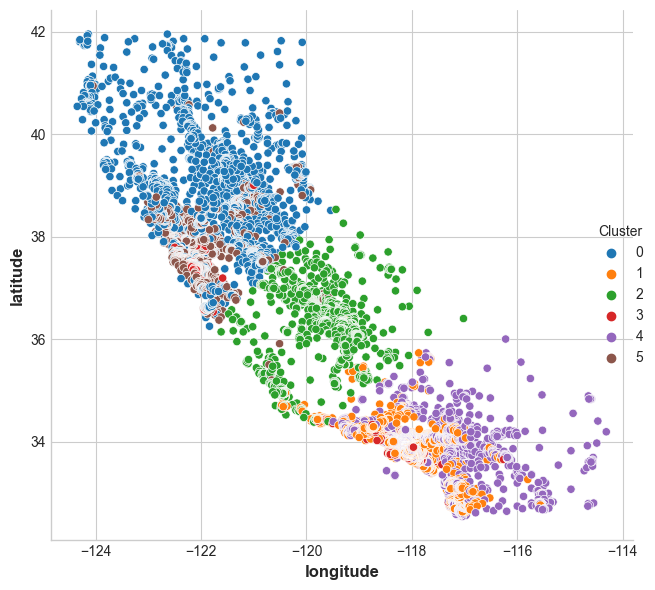

In [138]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);

The target in this dataset is median_house_value (median house value). These box-plots show the distribution of the target within each cluster.

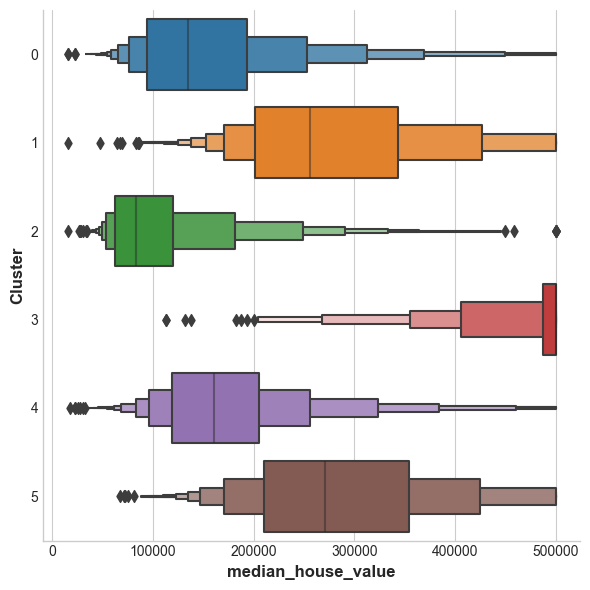

In [139]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="Cluster", data=X, kind="boxen", height=6);

# Association rules

Objetives:
* Knowing whether or not you are close to the beach, determine the price of the house. 

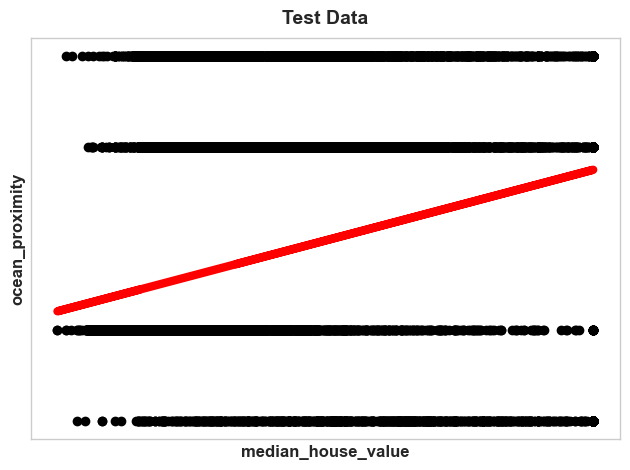

error 0.08232179148769458
error -0.0927600030700877


In [85]:
X = df['median_house_value']
Y = df['ocean_proximity_attr'] #target
#Y = df['housing_median_age']

X = X.values.reshape(len(X), 1)
Y = Y.values.reshape(len(Y), 1)

#Split data to train and validation
tot_train_X = int(len(X) * 0.7 + 1)
tot_train_Y = int(len(Y) * 0.7 + 1)

#Train Data
X_train = X[ : -tot_train_X]
Y_train = Y[ : -tot_train_Y]

#Validation Data
X_test = X[-tot_train_X : ]
Y_test = Y[-tot_train_Y : ]


#plot

plt.scatter(X_test, Y_test, color='black')
plt.title('Test Data')
plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.xticks(())
plt.yticks(())

#Create Linear regression object
regr = linear_model.LinearRegression()

#train the model using the training sets
regr.fit(X_train, Y_train) # model creation


#Plot outputs (model evaluation)
#By house price- predict a ocean proximity
plt.plot(X_test, regr.predict(X_test), color='red', linewidth=6)
plt.show()
print("R^2: ", regr.score(X_train, Y_train))
print("R^2 : ", regr.score(X_test, Y_test))


# Result Analysis

# Conclusion